<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Scatter Plot**


Estimated time needed: **45** minutes


## Overview

In this lab, you will focus on creating and interpreting scatter plots to visualize relationships between variables and trends in the dataset. The provided dataset will be directly loaded into a pandas DataFrame, and various scatter plot-related visualizations will be created to explore developer trends, compensation, and preferences.



## Objectives


In this lab, you will:

- Create and analyze scatter plots to examine relationships between variables.

- Use scatter plots to identify trends and patterns in the dataset.

- Focus on visualizations centered on scatter plots for better data-driven insights.


## Setup: Working with the Database



**Install and import the required libraries**


In [41]:
!pip install pandas
!pip install matplotlib
!pip install scikit-learn

import pandas as pd
import matplotlib.pyplot as plt

#### Step 1: Load the dataset


In [46]:
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"

df = pd.read_csv(file_path)
df.head()


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN



### Task 1: Exploring Relationships with Scatter Plots



#### 1. Scatter Plot for Age vs. Job Satisfaction



Visualize the relationship between respondents' age (`Age`) and job satisfaction (`JobSatPoints_6`). Use this plot to identify any patterns or trends.




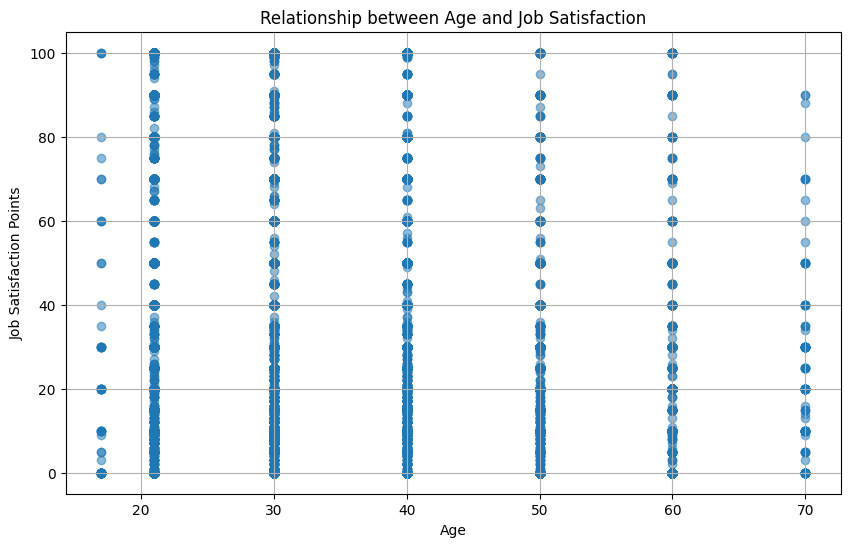

In [47]:
## Write your code here
age_mapping = {'Under 18 years old':17, '35-44 years old':40, '45-54 years old':50,
 '18-24 years old':21, '25-34 years old':30, '55-64 years old':60, 'Prefer not to say':0,
 '65 years or older':70}
df["Age"]= df["Age"].map(age_mapping)
index_to_drop = df[df["Age"] == 0].index 
df = df.drop(index_to_drop) 
df["JobSatPoints_6"] = pd.to_numeric(df["JobSatPoints_6"], errors="coerce")
df = df.dropna(subset=["JobSatPoints_6"])
plt.figure(figsize=(10, 6))
plt.scatter(df["Age"], df["JobSatPoints_6"], alpha=0.5)
plt.title("Relationship between Age and Job Satisfaction")
plt.xlabel("Age")
plt.ylabel("Job Satisfaction Points")
plt.grid(True)
plt.show()



#### 2. Scatter Plot for Compensation vs. Job Satisfaction


Explore the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`) using a scatter plot.


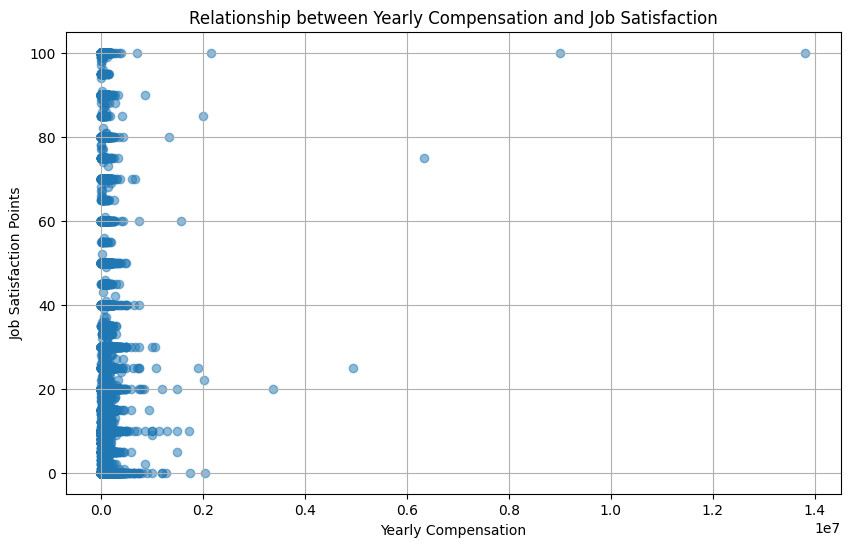

In [48]:
## Write your code here
plt.figure(figsize=(10, 6))
plt.scatter(df["ConvertedCompYearly"], df["JobSatPoints_6"], alpha=0.5)
plt.title("Relationship between Yearly Compensation and Job Satisfaction")
plt.xlabel("Yearly Compensation")
plt.ylabel("Job Satisfaction Points")
plt.grid(True)
plt.show()

### Task 2: Enhancing Scatter Plots


#### 1. Scatter Plot with Trend Line for Age vs. Job Satisfaction



Add a regression line to the scatter plot of Age vs. JobSatPoints_6 to highlight trends in the data.


/tmp/ipykernel_300/506036079.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


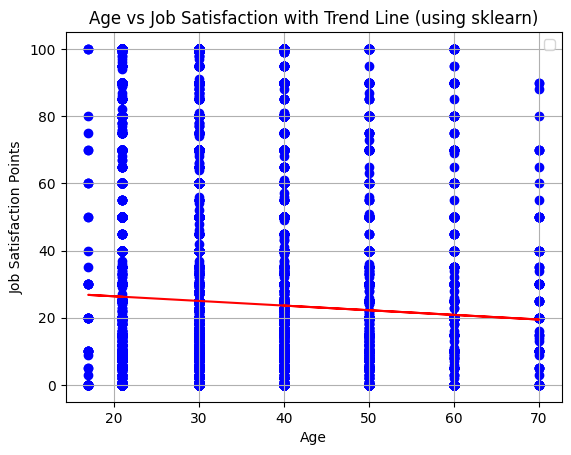

In [51]:
from sklearn.linear_model import LinearRegression
x = df[["Age"]]
y = df["JobSatPoints_6"]
model= LinearRegression()
model.fit(x, y)
y_pred = model.predict(x)
plt.scatter(x, y, color='blue')
plt.plot(x, y_pred, color='red')
plt.title('Age vs Job Satisfaction with Trend Line (using sklearn)')
plt.xlabel('Age')
plt.ylabel('Job Satisfaction Points')
plt.legend()
plt.grid(True)
plt.show()


#### 2. Scatter Plot for Age vs. Work Experience


Visualize the relationship between Age (`Age`) and Work Experience (`YearsCodePro`) using a scatter plot.


/tmp/ipykernel_300/3505813892.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['YearsCodePro'] = df['YearsCodePro'].replace({'Less than 1 year': '0', 'More than 50 years': '50'})


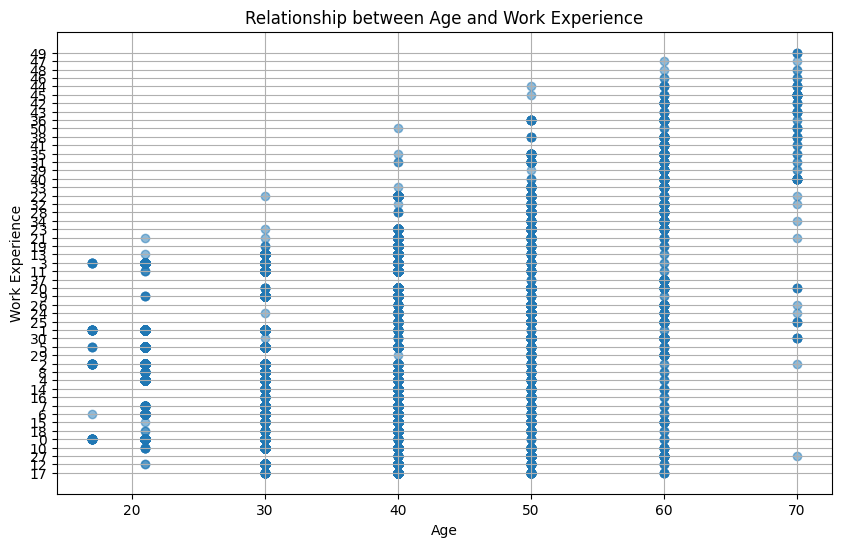

In [57]:
df['YearsCodePro'] = df['YearsCodePro'].replace({'Less than 1 year': '0', 'More than 50 years': '50'})
df = df.dropna(subset=['YearsCodePro'])
plt.figure(figsize=(10, 6))
plt.scatter(df["Age"], df["YearsCodePro"], alpha=0.5)
plt.title("Relationship between Age and Work Experience")
plt.xlabel("Age")
plt.ylabel("Work Experience")
plt.grid(True)
plt.show()

### Task 3: Combining Scatter Plots with Additional Features


#### 1. Bubble Plot of Compensation vs. Job Satisfaction with Age as Bubble Size



Create a bubble plot to explore the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`), with bubble size representing age.


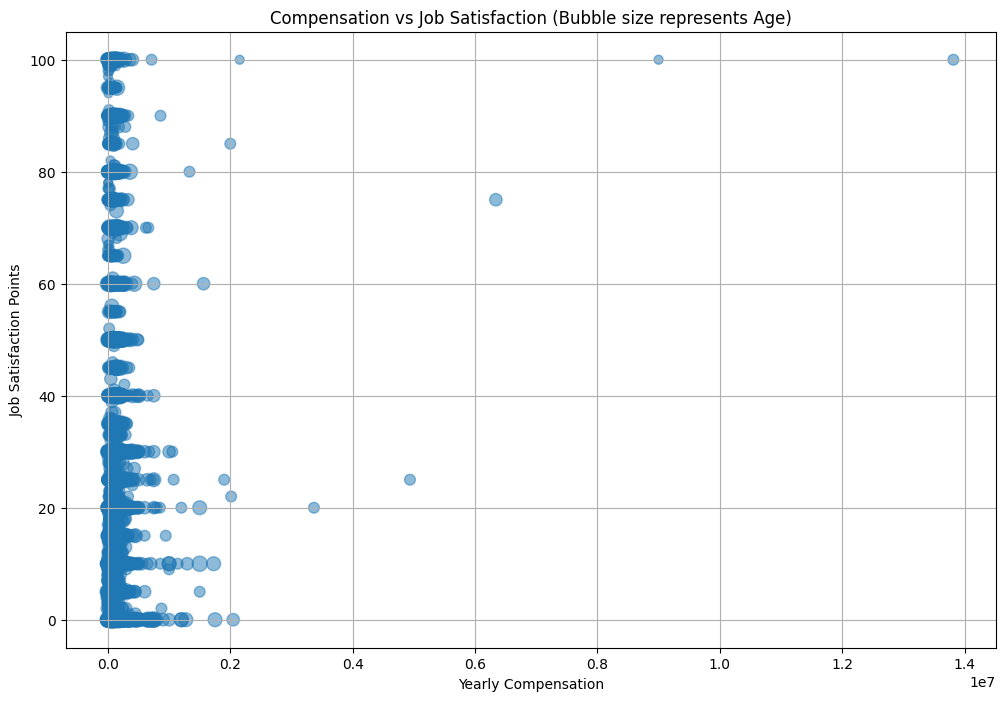

In [58]:
## Write your code here
plt.figure(figsize=(12, 8)) 
plt.scatter(df["ConvertedCompYearly"], df["JobSatPoints_6"], s=df["Age"]*2, alpha=0.5) 
plt.title('Compensation vs Job Satisfaction (Bubble size represents Age)')
plt.xlabel('Yearly Compensation')
plt.ylabel('Job Satisfaction Points')
plt.grid(True)
plt.show()

#### 2. Scatter Plot for Popular Programming Languages by Job Satisfaction


Visualize the popularity of programming languages (`LanguageHaveWorkedWith`) against job satisfaction using a scatter plot. Use points to represent satisfaction levels for each language.


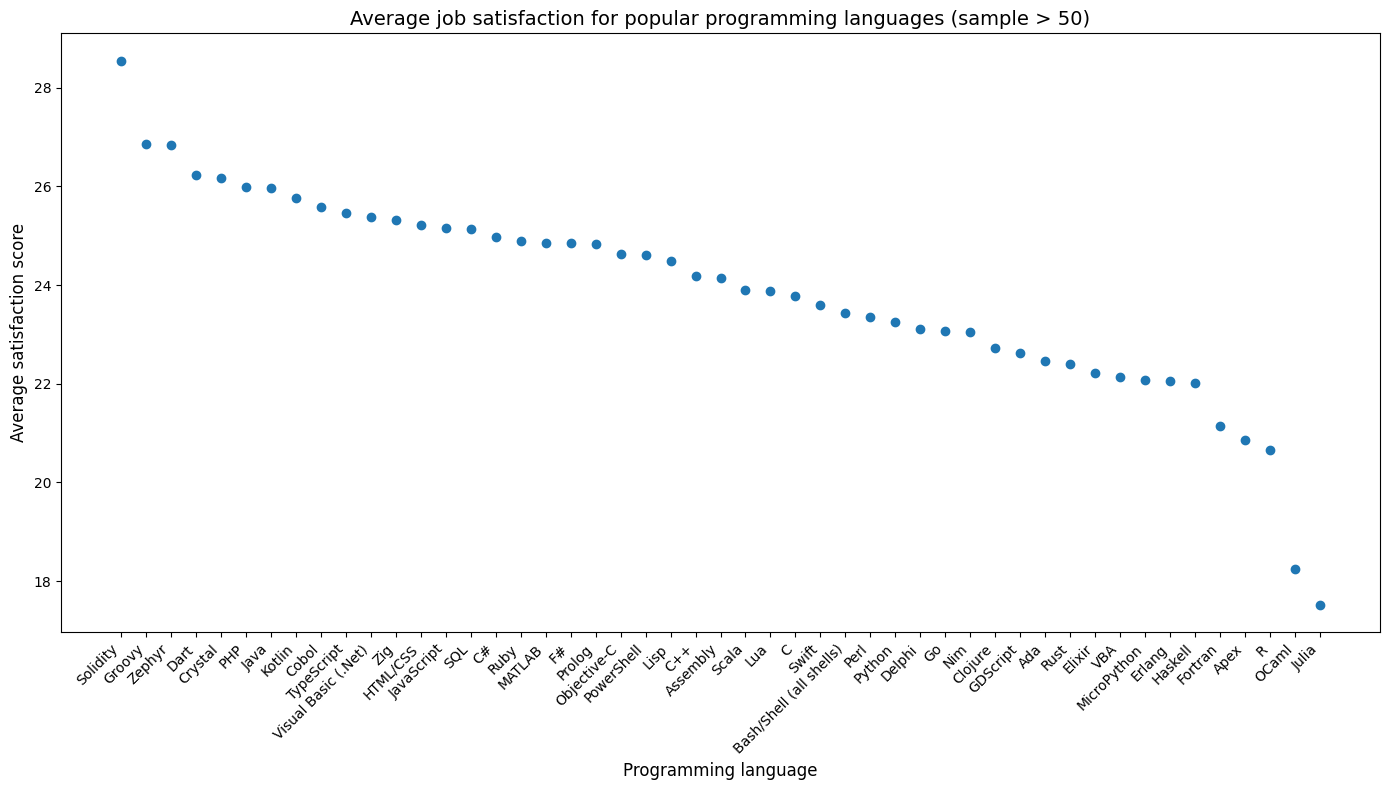

In [68]:
df_clean = df.dropna(subset=['LanguageHaveWorkedWith', 'JobSatPoints_6']).copy()

df_clean['Languages'] = df_clean['LanguageHaveWorkedWith'].str.split(';')

df_exploded = df_clean.explode('Languages')

lang_counts = df_exploded['Languages'].value_counts()
common_langs = lang_counts[lang_counts > 50].index
df_common = df_exploded[df_exploded['Languages'].isin(common_langs)]

language_stats = df_common.groupby('Languages')['JobSatPoints_6'].mean().sort_values(ascending=False)

plt.figure(figsize=(14, 8))
plt.scatter(x=language_stats.index, y=language_stats.values, marker='o')
plt.title('Average job satisfaction for popular programming languages (sample > 50)', fontsize=14)
plt.xlabel('Programming language', fontsize=12)
plt.ylabel('Average satisfaction score', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Task 4: Scatter Plot Comparisons Across Groups


#### 1. Scatter Plot for Compensation vs. Job Satisfaction by Employment Type


Visualize the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`), categorized by employment type (`Employment`). Use color coding or markers to differentiate between employment types.


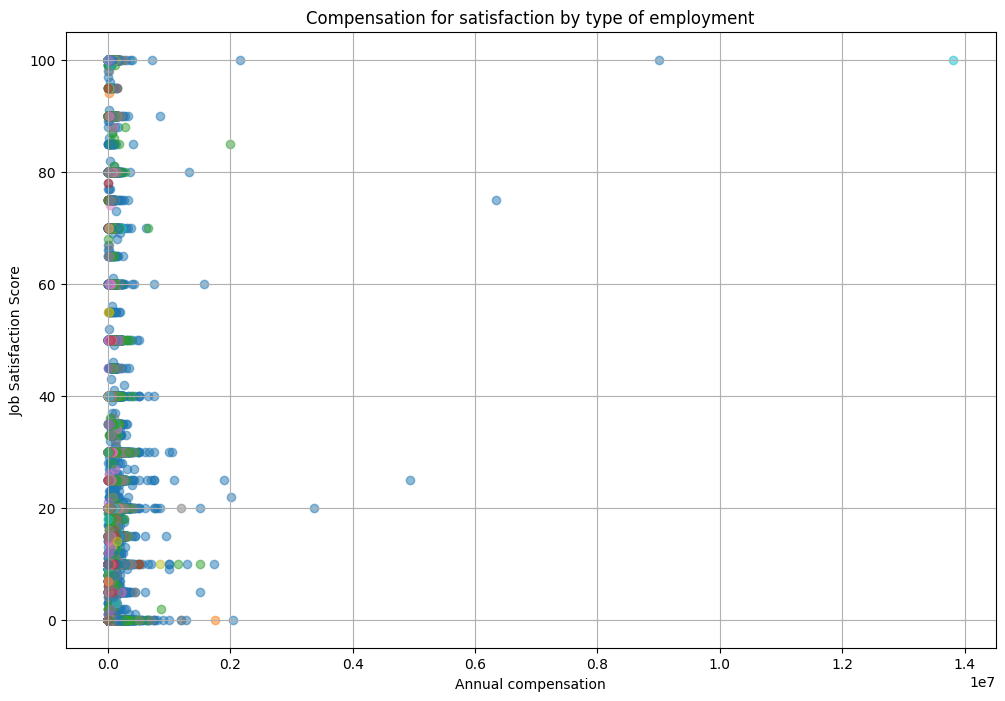

In [71]:
## Write your code here
plt.figure(figsize=(12, 8))
for employment_type in df['Employment'].unique():
    subset = df[df['Employment'] == employment_type]
    plt.scatter(subset['ConvertedCompYearly'], subset['JobSatPoints_6'], 
                label=employment_type, alpha=0.5)

plt.title('Compensation for satisfaction by type of employment')
plt.xlabel('Annual compensation')
plt.ylabel('Job Satisfaction Score')
plt.grid(True)
plt.show()

#### 2. Scatter Plot for Work Experience vs. Age Group by Country


Compare work experience (`YearsCodePro`) across different age groups (`Age`) and countries (`Country`). Use colors to represent different countries and markers for age groups.


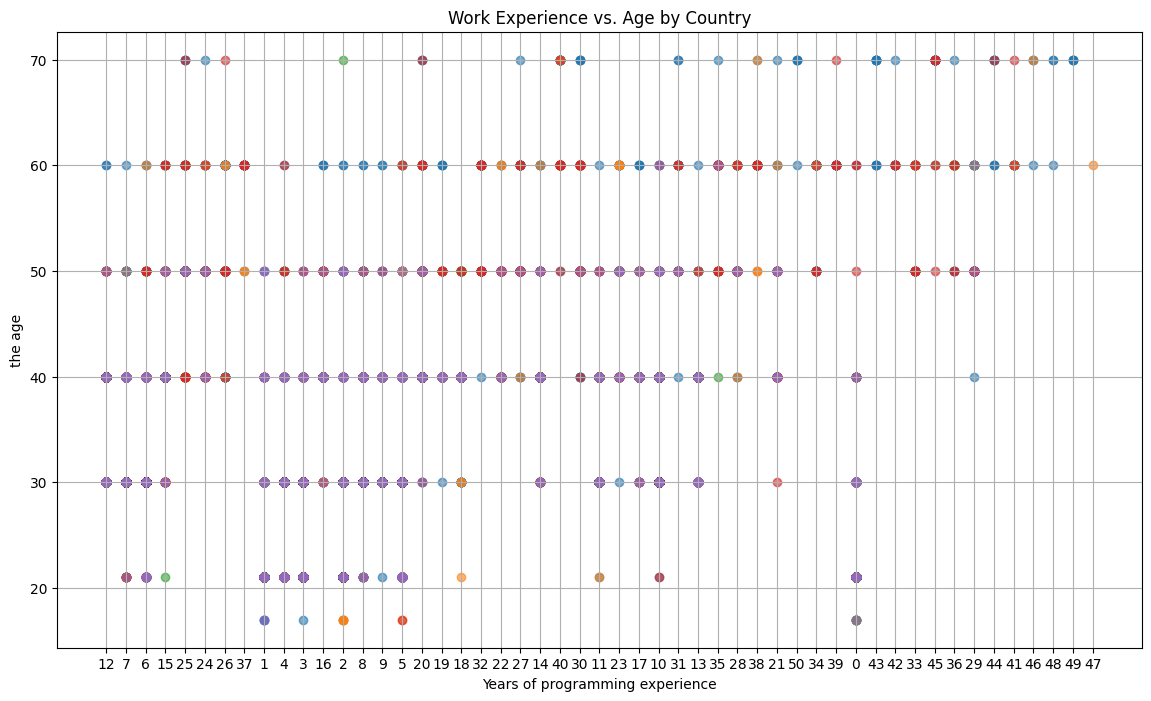

In [73]:
## Write your code here
top_countries = df['Country'].value_counts().head(5).index

plt.figure(figsize=(14, 8))
for country in top_countries:
    subset = df[df['Country'] == country]
    plt.scatter(subset['YearsCodePro'], subset['Age'], 
                label=country, alpha=0.6)

plt.title('Work Experience vs. Age by Country')
plt.xlabel('Years of programming experience')
plt.ylabel('the age')
plt.grid(True)
plt.show()

### Final Step: Review


With these scatter plots, you will have analyzed data relationships across multiple dimensions, including compensation, job satisfaction, employment types, and demographics, to uncover meaningful trends in the developer community.


### Summary


After completing this lab, you will be able to:
- Analyze how numerical variables relate across specific groups, such as employment types and countries.
- Use scatter plots effectively to represent multiple variables with color, size, and markers.
- Gain insights into compensation, satisfaction, and demographic trends using advanced scatter plot techniques.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|               
|2024-10-07|1.2|Madhusudan Moole|Reviewed and updated lab|                                                                                      
|2024-10-06|1.0|Raghul Ramesh|Created lab|-->


Copyright © IBM Corporation. All rights reserved.
